C:\Users\invas\AppData\Local\Temp\ipykernel_4784\4022219247.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.sort_values('total_data_centers', ascending=False),
C:\Users\invas\AppData\Local\Temp\ipykernel_4784\4022219247.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.sort_values('power_capacity_MW_total', ascending=False),
C:\Users\invas\AppData\Local\Temp\ipykernel_4784\4022219247.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.sort_values('average_renewable_energy_usage_percent', ascending=False),


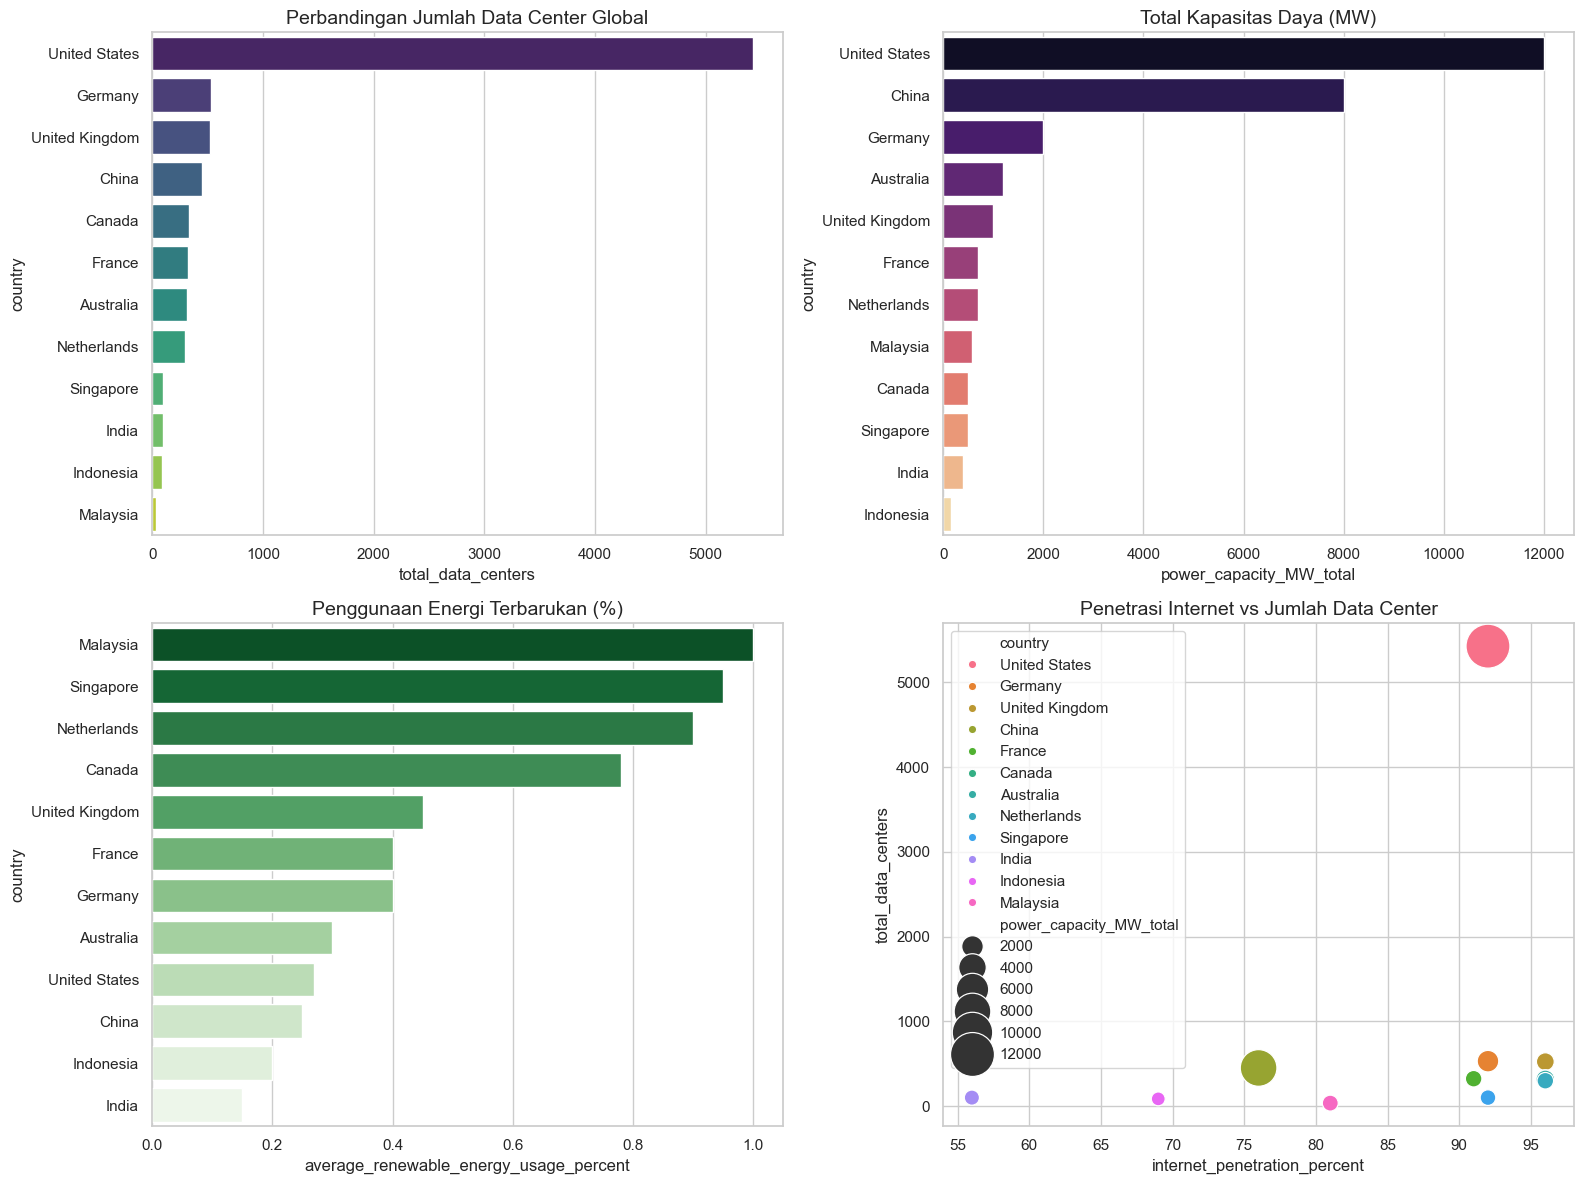

--- INSIGHT UNTUK VERUN ---
1. Indonesia memiliki 84 DC dengan kapasitas 150 MW.
2. Dibandingkan Singapore, kapasitas daya Indonesia hanya 30.0% dari Singapore.
3. Peluang: Penetrasi internet Indonesia (69%) masih punya ruang tumbuh besar dibanding global hub (>90%).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

# 1. LOAD DATA
# (Data diambil dari file yang kamu berikan)
csv_data = """country,total_data_centers,power_capacity_MW_total,average_renewable_energy_usage_percent,internet_penetration_percent
United States,5426,12000,0.27,92
Germany,529,2000,0.40,92
United Kingdom,523,1000,0.45,96
China,449,8000,0.25,76
France,322,700,0.40,91
Canada,336,500,0.78,96
Australia,314,1200,0.30,96
Netherlands,298,700,0.90,96
Singapore,99,500,0.95,92
India,99,400,0.15,56
Indonesia,84,150,0.20,69
Malaysia,34,566,1.00,81
"""

# Membaca data ke dalam DataFrame
df = pd.read_csv(io.StringIO(csv_data))

# 2. DATA CLEANING (Menyiapkan angka agar bisa dihitung)
# Karena data mentah mungkin punya string, kita pastikan tipenya numeric
cols_to_fix = ['total_data_centers', 'power_capacity_MW_total', 'average_renewable_energy_usage_percent', 'internet_penetration_percent']
for col in cols_to_fix:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 3. ANALISIS SEDERHANA
# Menghitung Rasio Kapasitas Daya per Data Center (Efisiensi)
df['MW_per_DC'] = df['power_capacity_MW_total'] / df['total_data_centers']

# 4. VISUALISASI
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Chart 1: Jumlah Data Center (Indonesia vs Others)
sns.barplot(data=df.sort_values('total_data_centers', ascending=False), 
            x='total_data_centers', y='country', ax=axes[0,0], palette='viridis')
axes[0,0].set_title('Perbandingan Jumlah Data Center Global', fontsize=14)

# Chart 2: Kapasitas Daya (MW) - Menunjukkan kekuatan infrastruktur
sns.barplot(data=df.sort_values('power_capacity_MW_total', ascending=False), 
            x='power_capacity_MW_total', y='country', ax=axes[0,1], palette='magma')
axes[0,1].set_title('Total Kapasitas Daya (MW)', fontsize=14)

# Chart 3: Persentase Energi Terbarukan (SDG 7 & 9)
sns.barplot(data=df.sort_values('average_renewable_energy_usage_percent', ascending=False), 
            x='average_renewable_energy_usage_percent', y='country', ax=axes[1,0], palette='Greens_r')
axes[1,0].set_title('Penggunaan Energi Terbarukan (%)', fontsize=14)

# Chart 4: Korelasi Internet Penetration vs Jumlah DC
sns.scatterplot(data=df, x='internet_penetration_percent', y='total_data_centers', 
                size='power_capacity_MW_total', hue='country', sizes=(100, 1000), ax=axes[1,1])
axes[1,1].set_title('Penetrasi Internet vs Jumlah Data Center', fontsize=14)

plt.tight_layout()
plt.show()

# 5. RINGKASAN UNTUK BAHAN PRESENTASI
indo = df[df['country'] == 'Indonesia'].iloc[0]
sgp = df[df['country'] == 'Singapore'].iloc[0]

print(f"--- INSIGHT UNTUK VERUN ---")
print(f"1. Indonesia memiliki {indo['total_data_centers']} DC dengan kapasitas {indo['power_capacity_MW_total']} MW.")
print(f"2. Dibandingkan Singapore, kapasitas daya Indonesia hanya {round((indo['power_capacity_MW_total']/sgp['power_capacity_MW_total'])*100, 2)}% dari Singapore.")
print(f"3. Peluang: Penetrasi internet Indonesia ({indo['internet_penetration_percent']}%) masih punya ruang tumbuh besar dibanding global hub (>90%).")